##**Task**:

Build a model to predict whether a person survived or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import OneHotEncoder
matplotlib.style.use('ggplot')

%matplotlib inline

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Data exploration and cleaning:

In [2]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
#check missing values
#note that we have missing values in 'Age', 'Cabin' , 'Fare' and 'Embarked' 
df.info()
print
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null floa

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### drop unnecessary columns

In [6]:
#Intuitively, the chance of surviving has no correlation with the passenger ID, 
#the ticket name or where the person embarked.
#Drop Cabin b/c there are too many missing values.
df = df.drop(['PassengerId','Ticket','Cabin','Embarked'], axis = 1)
test_df = test_df.drop(['Ticket','Cabin','Embarked'], axis = 1)

#### missing values

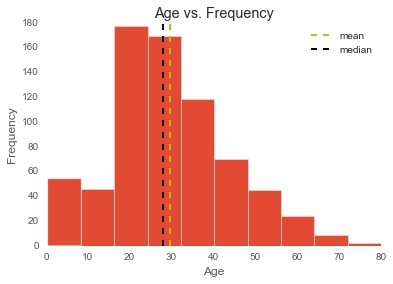

In [7]:
#'Age'.
#Plot a histogram to show the distribution of age.
#Notice that the plot is skewed to the right.
df['Age'].hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age vs. Frequency")
plt.axvline(df['Age'].mean(), color='y', linestyle='dashed', linewidth=2, label = 'mean')
plt.axvline(df['Age'].median(), color='k', linestyle='dashed', linewidth=2, label = 'median')
plt.legend()
plt.show()

#### extract Title info

In [8]:
import re

In [9]:
def getTitle(name):
    pattern = "\s[a-zA-Z_]+\."
    n = re.search(pattern, name)
    return n.group(0)[1:]

In [10]:
df['Title'] = df['Name'].map(lambda x: getTitle(x))

In [11]:
test_df['Title'] = test_df['Name'].map(lambda x: getTitle(x))

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


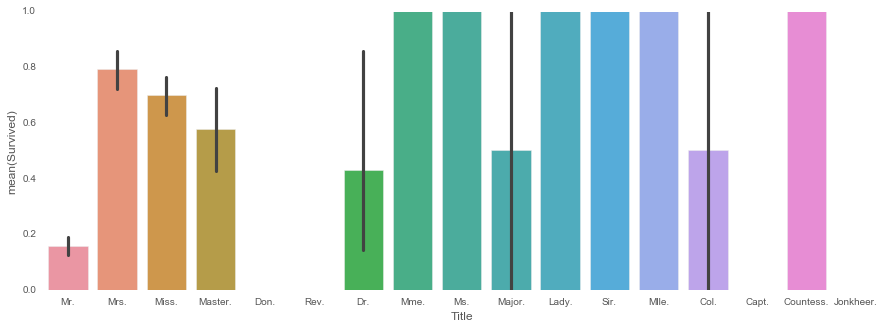

In [12]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'Title', y = 'Survived', data = df)

In [34]:
title_age_lookup = df.groupby('Title')['Age'].mean(); title_age_lookup

Title
Capt.        70.000000
Col.         58.000000
Countess.    33.000000
Don.         40.000000
Dr.          42.000000
Jonkheer.    38.000000
Lady.        48.000000
Major.       48.500000
Master.       4.574167
Miss.        21.773973
Mlle.        24.000000
Mme.         24.000000
Mr.          32.368090
Mrs.         35.898148
Ms.          28.000000
Rev.         43.166667
Sir.         49.000000
Name: Age, dtype: float64

In [35]:
def fill_age(df):
    if pd.isnull(df['Age']):
        return title_age_lookup[df['Title']]
    else:
        return df['Age']

In [36]:
df['Age'] = df.apply(fill_age, axis = 1)

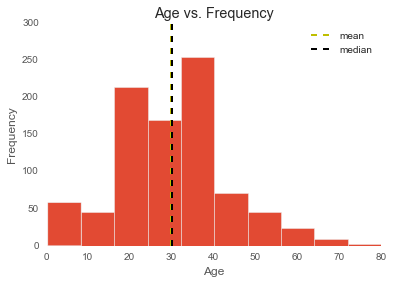

In [38]:
#'Age - After imputation'.
#Plot a histogram to show the distribution of age.
df['Age'].hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age vs. Frequency")
plt.axvline(df['Age'].mean(), color='y', linestyle='dashed', linewidth=2, label = 'mean')
plt.axvline(df['Age'].median(), color='k', linestyle='dashed', linewidth=2, label = 'median')
plt.legend()
plt.show()

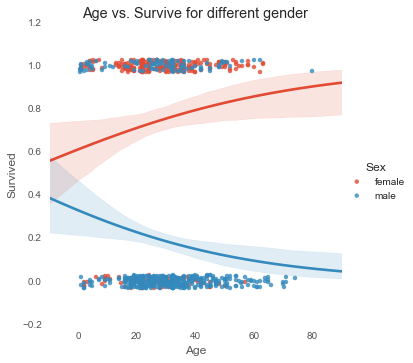

In [40]:
#average survived passengers by age and gender
#male and female have completely different relationship between age and survival chance
#Overall, females have much higher chance to survive.
sns.lmplot(x = 'Age', 
           y = 'Survived', 
           hue = 'Sex',
           data = df, 
           logistic=True, 
           y_jitter=.03, 
           hue_order=['female','male'])
plt.title("Age vs. Survive for different gender")

In [41]:
#fare: there is only one missing value - replace the missing value with median.
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

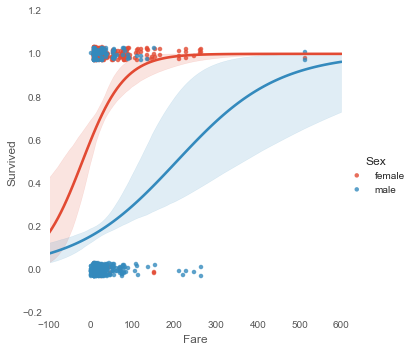

In [42]:
sns.lmplot(x = 'Fare', y = 'Survived', hue = 'Sex',data = df, hue_order=['female','male'],
           logistic=True, y_jitter=.03)

In [43]:
#family: a binary indicator of whether travelled with family or alone. 
#1: with family
#0: alone
def fam(df):
    df['Family'] = df['SibSp']+df['Parch']
    # df = df.drop(['SibSp', 'Parch'], axis = 1)
    df['Family'].loc[df['Family']>0] = 1
    return df

In [44]:
df = fam(df)
test_df = fam(test_df)

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


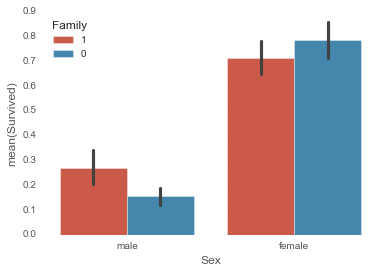

In [45]:
sns.barplot('Sex', 'Survived',data=df, hue = 'Family')

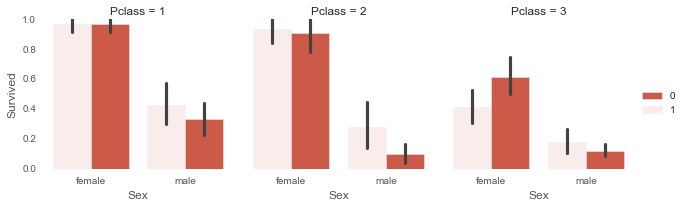

In [46]:
g = sns.FacetGrid(df, col="Pclass", col_order=[1,2,3])
g.map(sns.barplot, "Sex","Survived","Family", order=['female','male']);
g.add_legend();

In [47]:
#X['Sex'] = map(lambda x: 1 if x=='female' else 0, X['Sex'])
def catToNum(X):
    X['Sex'].loc[X['Sex'] == 'male'] = 0
    X['Sex'].loc[X['Sex'] == 'female'] = 1
    return X

In [48]:
train = catToNum(df)
test = catToNum(test_df)

In [49]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,Family
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,Mr.,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,Mrs.,1
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,Miss.,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,Mrs.,1
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,Mr.,0


In [50]:
train = train.drop('Name',axis = 1)
test = test.drop('Name',axis = 1)

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Title       891 non-null object
Family      891 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 69.6+ KB


In [52]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,Family
0,0,3,"Braund, Mr. Owen Harris",0,22,1,0,7.2500,Mr.,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,71.2833,Mrs.,1
2,1,3,"Heikkinen, Miss. Laina",1,26,0,0,7.9250,Miss.,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,53.1000,Mrs.,1
4,0,3,"Allen, Mr. William Henry",0,35,0,0,8.0500,Mr.,0


## Modelling

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from sklearn.grid_search import RandomizedSearchCV

In [54]:
ntree = range(100,2000,100)
min_split = range(1,10,1)
min_leaf = range(1,10,1)
param_grid = dict(n_estimators = ntree, min_samples_split=min_split, min_samples_leaf = min_leaf)

In [31]:
X = train.drop('Survived', axis = 1)
y = train['Survived']
forest = RandomForestClassifier(
    random_state = 1,
    oob_score = True
)

In [32]:
rand = RandomizedSearchCV(forest, param_distributions = param_grid, cv=10,n_iter=30, scoring='accuracy',n_jobs=4)

In [41]:
rand.fit(X,y)

In [ ]:
#print rand.grid_scores_
print rand.best_score_
print rand.best_params_

In [34]:
forest = RandomForestClassifier(
    random_state = 1,
    n_estimators = 1400, 
    min_samples_split = 7, 
    min_samples_leaf = 3,
    oob_score = True
    #min_weight_fraction_leaf = 0.2
)

In [35]:
scores = cross_validation.cross_val_score(
    forest, 
    X, 
    y
)

In [36]:
print(scores.mean())

0.828282828283


In [37]:
def submission(alg, trainX,trainY,test, filename):
    alg.fit(trainX,trainY)
    predictions = alg.predict(test.drop("PassengerId",axis=1))
    sub = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
        })
    sub.to_csv(filename, index = False)

In [38]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Family
0,3,0,22,1,0,7.2500,0,1
1,1,1,38,1,0,71.2833,1,1
2,3,1,26,0,0,7.9250,1,0
3,1,1,35,1,0,53.1000,1,1
4,3,0,35,0,0,8.0500,0,0


In [39]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Family
0,892,3,0,34,0,0,7.8292,0,0
1,893,3,1,47,1,0,7.0000,1,1
2,894,2,0,62,0,0,9.6875,0,0
3,895,3,0,27,0,0,8.6625,0,0
4,896,3,1,22,1,1,12.2875,1,1


In [40]:
submission(forest, X,y,test, 'output.csv')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)

In [ ]:
scores = cross_validation.cross_val_score(
    clf, 
    X, 
    y
)

In [ ]:
print(scores.mean())

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_validation.cross_val_score(clf, X,y)
print(scores.mean())

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
        max_depth=1, random_state=0).fit(X,y)
scores = cross_validation.cross_val_score(clf, X,y)
print(scores.mean())